In [16]:
#Import relevant libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import sklearn as sk
import sklearn.model_selection as ms
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from django.core.wsgi import get_wsgi_application
from matplotlib import pyplot as plt
import sys
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/scripts/')
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/')
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/hedonic_model/ml/utils/')
import load_properties as lp
import load_soldproperties as lsp
lp.setup_environment()
%matplotlib inline
import mplleaflet
import ast
import data_utils
import data_utils as du
from scipy.stats import norm, skew 


import properties...


In [18]:
#Create df of SoldProperties
#Base off this kernel: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
from hedonic_model.models import SoldProperty
#Data included: Built after 1900; at least 1BR and 1BATH; 
#Px btw 50k-2mm
from hedonic_model.models import ListProperty
from django_pandas.io import read_frame
pd.options.display.float_format = '{:.2f}'.format
qs = SoldProperty.objects.all()
df = read_frame(qs)
#Create test set and training set
df_train, df_test = ms.train_test_split(df,test_size=0.2)
print('size of training set: {} homes'.format(len(df_train)))
print('size of test set: {} homes'.format(len(df_test)))


size of training set: 1232 homes
size of test set: 308 homes


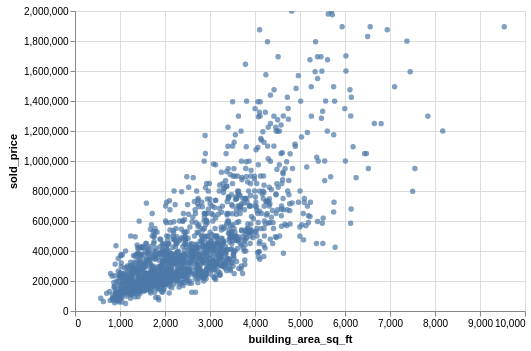

In [19]:
df.vgplot.scatter('building_area_sq_ft','sold_price')

<b> Getting MAPE of some basic regressions </b>

<b> Regression of Building Area Sq Ft with no LogNorm </b>

In [3]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
df_all = pd.concat([df_train,df_test],axis=0)



In [5]:
df_all = df_all[(df_all['sold_price']<500000) & (df_all['sold_price']>150000) ]

In [6]:
numeric_feats = df_all.dtypes[df_all.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_all[skewed_feats] = np.log1p(df_all[skewed_feats])


In [7]:
df_all.columns

Index(['id', 'street_address_1', 'street_address_2', 'city', 'state',
       'zip_code', 'latitude', 'longitude', 'hc_slug', 'lowercase_slug',
       'sold_price', 'num_bedrooms', 'num_bathrooms', 'building_area_sq_ft',
       'home_type', 'sale_price_history', 'certified_max_bid',
       'certified_max_bid_created_at', 'house_canary_avm', 'red_bell_ave',
       'red_bell_ar_bpo', 'red_bell_bpo', 'num_floors', 'rx_num_half_bath',
       'rx_num_full_bath', 'year_built', 'listing_status', 'flooring',
       'interior_features', 'remax_url', 'subdivision', 'description',
       'is_foreclosure', 'has_septic', 'has_pool',
       'has_established_subdivision', 'has_well', 'has_garage',
       'no_pool_well_septic', 'local_school_quality', 'garage_size',
       'img_path_header', 'img_paths_gallery'],
      dtype='object')

In [8]:
df_all = df_all[['sold_price','state','num_bedrooms','num_bathrooms','building_area_sq_ft','home_type','year_built','zip_code']]

In [9]:
df_all['num_bathrooms']=df_all['num_bathrooms'].apply(lambda x: float(x))
df_all['num_bedrooms']=df_all['num_bedrooms'].apply(lambda x: float(x))

In [10]:
df_all

,sold_price,state,num_bedrooms,num_bathrooms,building_area_sq_ft,home_type,year_built,zip_code
854,12.01,NC,3.00,2.00,7.16,Single Family,1987,28273
163,12.79,NC,4.00,3.00,8.03,Single Family,1999,28277
284,12.92,NC,4.00,4.00,8.12,Single Family,1978,28211
374,12.97,NC,3.00,3.00,7.43,Single Family,1930,28205
1494,13.05,NC,5.00,4.00,8.32,Single Family,2007,28227
429,12.85,NC,3.00,3.00,7.81,Single Family,2014,28208
776,12.99,NC,4.00,3.00,7.63,Single Family,1992,28209
853,12.52,NC,4.00,3.00,8.01,Single Family,1999,28269
1312,12.04,NC,3.00,2.00,7.28,Single Family,1986,28273
1157,12.35,NC,3.00,2.00,7.25,Single Family,1984,28211


In [11]:
df_all = pd.get_dummies(df_all)


In [12]:
df_all = df_all.fillna(df_all.mean())


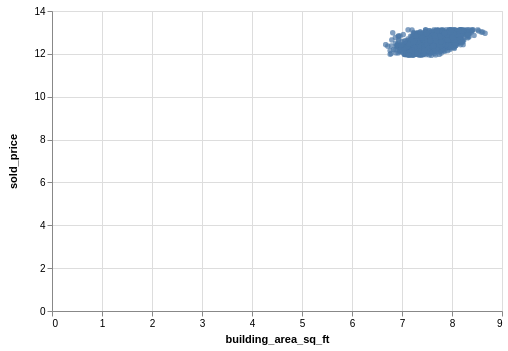

In [15]:
df_all.vgplot.scatter('building_area_sq_ft','sold_price')

In [13]:
#missing data
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)


,Total,Percent
zip_code_28278,0,0.00
zip_code_28277,0,0.00
num_bedrooms,0,0.00
num_bathrooms,0,0.00
building_area_sq_ft,0,0.00
year_built,0,0.00
state_NC,0,0.00
home_type_Single Family,0,0.00
zip_code_28203,0,0.00
zip_code_28204,0,0.00


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = df_all['sold_price']

In [16]:
try:
    df_all.pop('sold_price')
except:
    print('already popped sold price')
X = df_all

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)



In [19]:
alphas = [0.01,0.05,0.25,1,5, 10, 15, 30, 50, 75,100]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

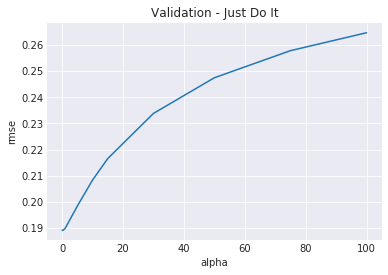

In [20]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [21]:
cv_ridge.min()

0.1891219215368096

In [22]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train.values, y_train.values)


In [23]:
rmse_cv(model_lasso).mean()


0.19002916666240063

In [24]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)



In [25]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 23 variables and eliminated the other 6 variables


In [26]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

In [27]:
import matplotlib as mpl

Text(0.5,1,'Coefficients in the Lasso Model')

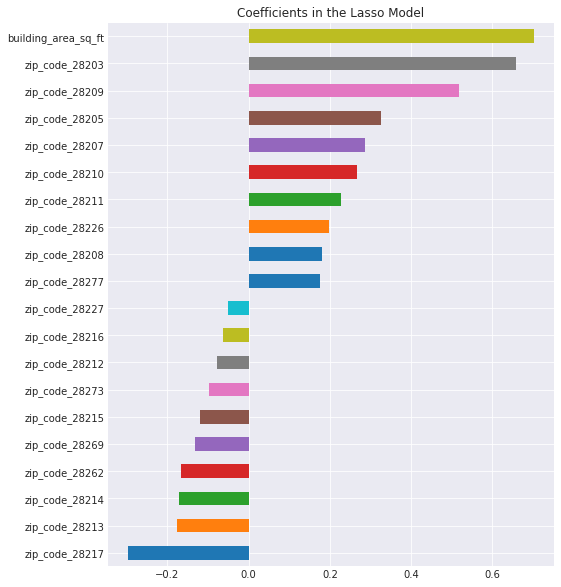

In [28]:
mpl.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [29]:
model_lasso.predict(X_train.values[1].reshape(1,-1))

array([ 12.76073249])

In [30]:
y_pred = model_lasso.predict(X_train.values)

In [31]:
y_pred.shape

(661,)

In [32]:
y_true = y_train

In [33]:
y_true.shape

(661,)

In [34]:
y_pred[0]

12.846893434429157

In [35]:
y_pred_real = np.exp(y_pred)
y_true_real = np.exp(y_true).values

In [36]:
errors = (y_pred_real-y_true_real)/y_true_real

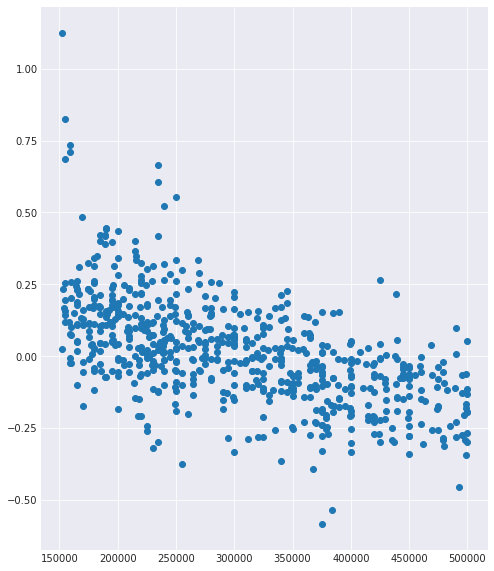

In [37]:
plt.scatter(y_true_real, errors)

In [38]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [39]:
model_xgb.fit(X_train.values,y_train.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [40]:
xdb_ypred = model_xgb.predict(X_train.values)

In [41]:
xdb_ypred_real = np.exp(xdb_ypred)

In [42]:
xdb_err = (xdb_ypred_real-y_true_real)/y_true_real

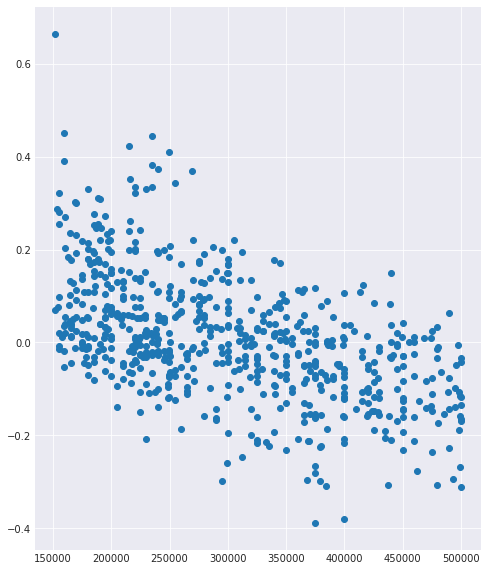

In [43]:
plt.scatter(y_true_real,xdb_err)

In [44]:
#Import libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

regression assumptions
1. liner relationship
2. homoskedacitity (volatility of errors is constant)
3. multivariate normal
4. no strong multicollinearity
5. no strong auto-correlation of errors (soln: add time dummy)


1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
    * missing data: is the data important? how much is missing? should we impute it or just fill it in with the mean?
    * outliers: what is a reasonable threshold for an outlier?  is it a true outlier or just an extrapolation
    * categorical variables: one hot encoding, use dummies
5. Test assumptions.


regularization:
l1 lasso penalty term is the abs # of coeff.  so can remove some coefficients entirely, good for feature selection
l2 ridge penalty term is the sq # of coeff, so reduces coeff but doesnt remove them entirely


In [45]:

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1812 (0.0070)

